In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\psaic\Downloads\Mall_Customers.csv")

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
x=df.iloc[:,3:].values

In [6]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

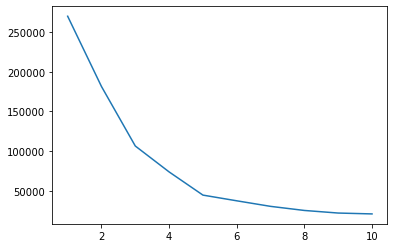

In [65]:
from sklearn.cluster import KMeans
wcss=[]  #creating empty list
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++", random_state=0, max_iter=20)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)

In [36]:
kmeans=KMeans(n_clusters=5,init="k-means++", random_state=0)

In [37]:
kmeans

KMeans(n_clusters=5, random_state=0)

In [38]:
y_kmeans=kmeans.fit_predict(x)

In [39]:
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [45]:
# Create a new datafame with cluster labels to it.
df_c= df.copy()
df_c['y_kmeans'] =y_kmeans

df_c.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),y_kmeans
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


In [47]:
df_c.shape

(200, 6)

In [72]:
def box_plot1(y_kmeans,data):
    plt.figure(figsize=(18, 5))
    plt.subplot(1, 3, 1)
    sns.boxplot(x=y_kmeans, y='Annual Income (k$)', data=df, palette="bright", )
    plt.subplot(1, 3, 2)
    sns.boxplot(x=y_kmeans, y='Spending Score (1-100)', data=df, palette="bright")
    plt.subplot(1, 3, 3)
    sns.boxplot(x=y_kmeans, y='Age', data=df, palette="bright")

    plt.show()

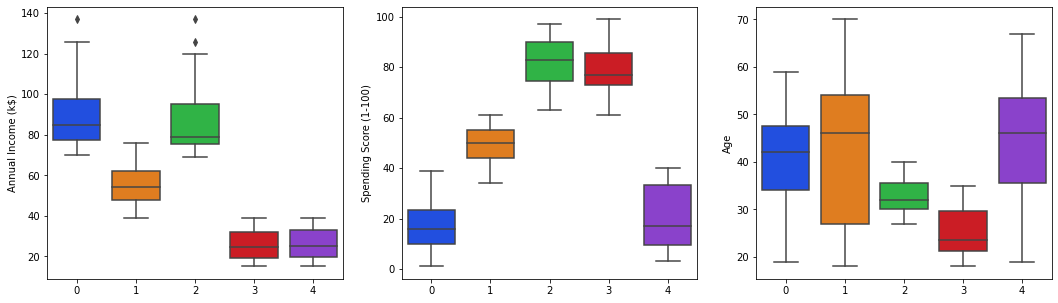

In [73]:
box_plot1(y_kmeans,df_c)

In [55]:
df_c.y_kmeans.value_counts()

1    81
2    39
0    35
4    23
3    22
Name: y_kmeans, dtype: int64

In [60]:

df_c[df_c['y_kmeans'] == 4]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),y_kmeans
0,1,Male,19,15,39,4
2,3,Female,20,16,6,4
4,5,Female,31,17,40,4
6,7,Female,35,18,6,4
8,9,Male,64,19,3,4
10,11,Male,67,19,14,4
12,13,Female,58,20,15,4
14,15,Male,37,20,13,4
16,17,Female,35,21,35,4
18,19,Male,52,23,29,4


In [61]:
df_c[df_c['y_kmeans'] == 3]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),y_kmeans
1,2,Male,21,15,81,3
3,4,Female,23,16,77,3
5,6,Female,22,17,76,3
7,8,Female,23,18,94,3
9,10,Female,30,19,72,3
11,12,Female,35,19,99,3
13,14,Female,24,20,77,3
15,16,Male,22,20,79,3
17,18,Male,20,21,66,3
19,20,Female,35,23,98,3


In [62]:
df_c[df_c['y_kmeans'] == 0]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),y_kmeans
124,125,Female,23,70,29,0
128,129,Male,59,71,11,0
130,131,Male,47,71,9,0
134,135,Male,20,73,5,0
136,137,Female,44,73,7,0
138,139,Male,19,74,10,0
140,141,Female,57,75,5,0
144,145,Male,25,77,12,0
146,147,Male,48,77,36,0
148,149,Female,34,78,22,0


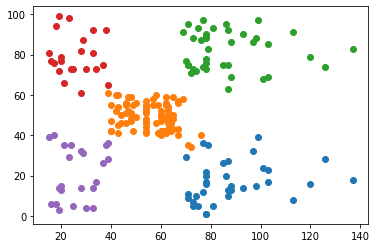

In [40]:
plt.scatter(x[y_kmeans==0 ,0],x[y_kmeans==0,1])
plt.scatter(x[y_kmeans==1 ,0],x[y_kmeans==1,1])
plt.scatter(x[y_kmeans==2 ,0],x[y_kmeans==2,1])
plt.scatter(x[y_kmeans==3 ,0],x[y_kmeans==3,1])
plt.scatter(x[y_kmeans==4 ,0],x[y_kmeans==4,1])